# Ejercicio 1 b

Se lee la imagen original

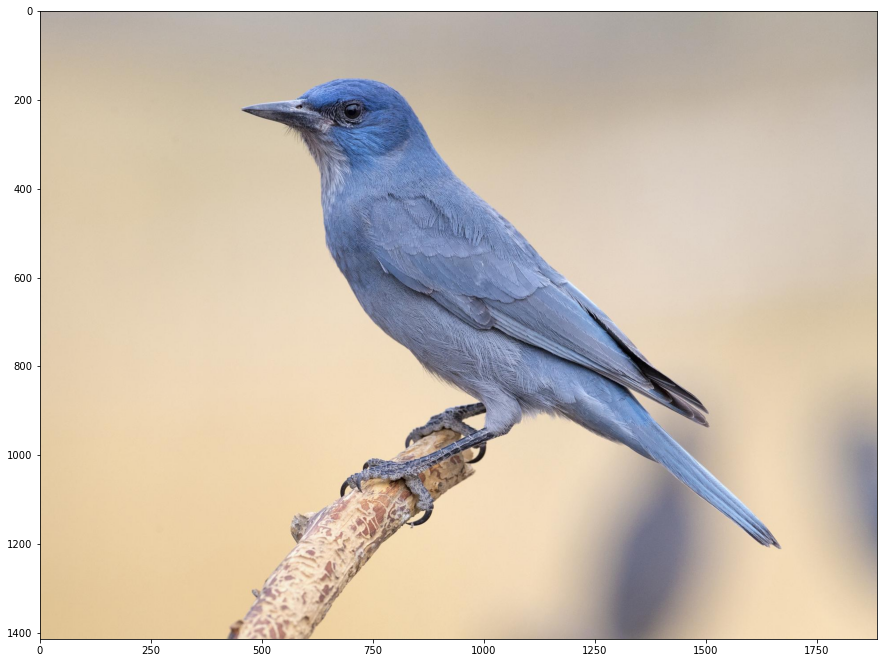

In [ ]:
bird = cv2.imread('../resources/bird.jpg')
bird = cv2.cvtColor(bird, cv2.COLOR_BGR2RGB)

fig = plt.figure()
fig.set_size_inches(15, 15)
plt.imshow(bird)
plt.show()

Se convierte la imagen al espacio HSV para poder segmentar mejor los colores buscados. Se observa en el ave una importante presencia de tonalidades de celeste y gris, las cuales serán entonces el objetivo a segmentar.

In [ ]:
# Convert the image from RGB to HSV
hsv_bird = cv2.cvtColor(bird, cv2.COLOR_RGB2HSV)

In [ ]:
# Normalising list of pixels
pixel_colors_bird = bird.reshape((np.shape(bird)[0] * np.shape(bird)[1], 3))
norm = colors.Normalize(vmin=-1., vmax=1.)
norm.autoscale(pixel_colors_bird)
pixel_colors_bird = norm(pixel_colors_bird).tolist()

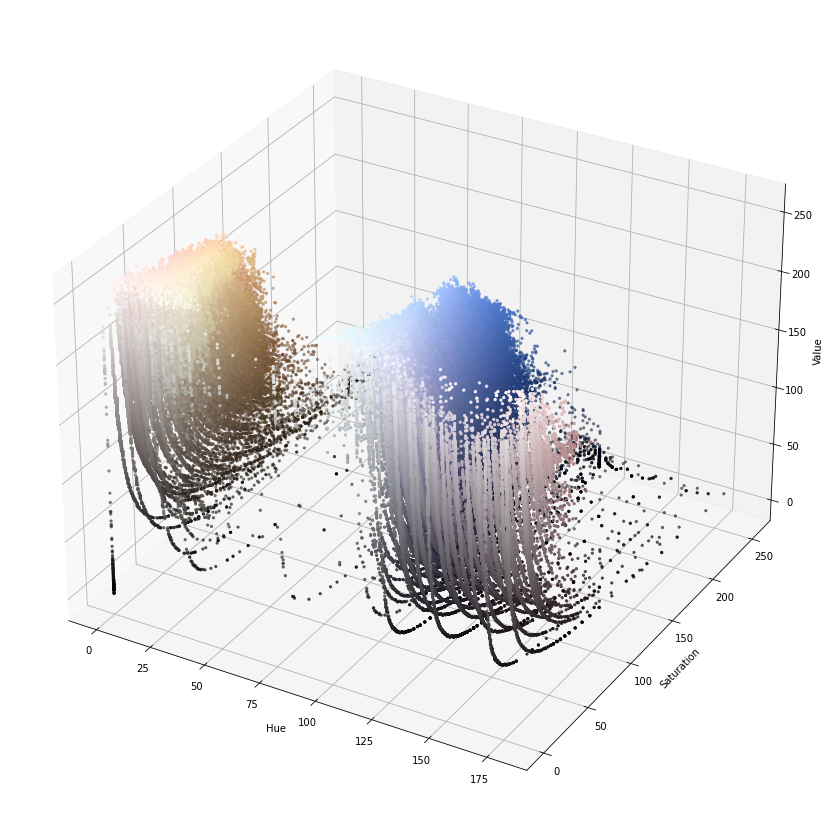

In [ ]:
# Plotting distribution of pixels in 3D HSV colour space
h, s, v = cv2.split(hsv_bird)
fig = plt.figure()
fig.set_size_inches(15, 15)
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors_bird, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

En el gráfico se marcan dos claras zonas, una poblada por tonalidades de naranja claro, correspondientes al fondo de la imagen, y otra con las tonalidades de celeste y gris que identifican al pájaro.

Se genera un filtro para estas tonalidades buscadas.

In [ ]:
light_blue = (75, 0, 0)#(100, 10, 170)
dark_blue = (160, 255, 255)

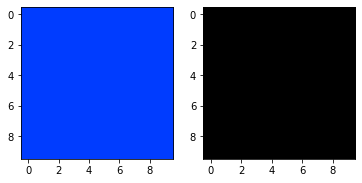

In [ ]:
lb_square = np.full((10, 10, 3), light_blue, dtype=np.uint8) / 255.0
db_square = np.full((10, 10, 3), dark_blue, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(db_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lb_square))
plt.show()

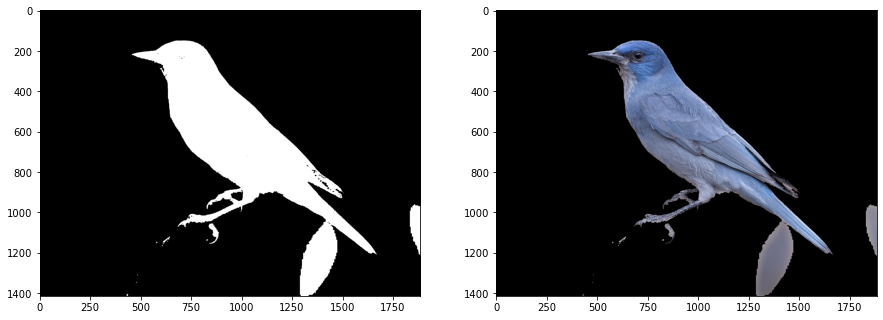

In [ ]:
mask_blue = cv2.inRange(hsv_bird, light_blue, dark_blue)
result_blue = cv2.bitwise_and(bird, bird, mask=mask_blue)

fig = plt.figure()
fig.set_size_inches(15, 15)
plt.subplot(1, 2, 1)
plt.imshow(mask_blue, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_blue)
plt.show()

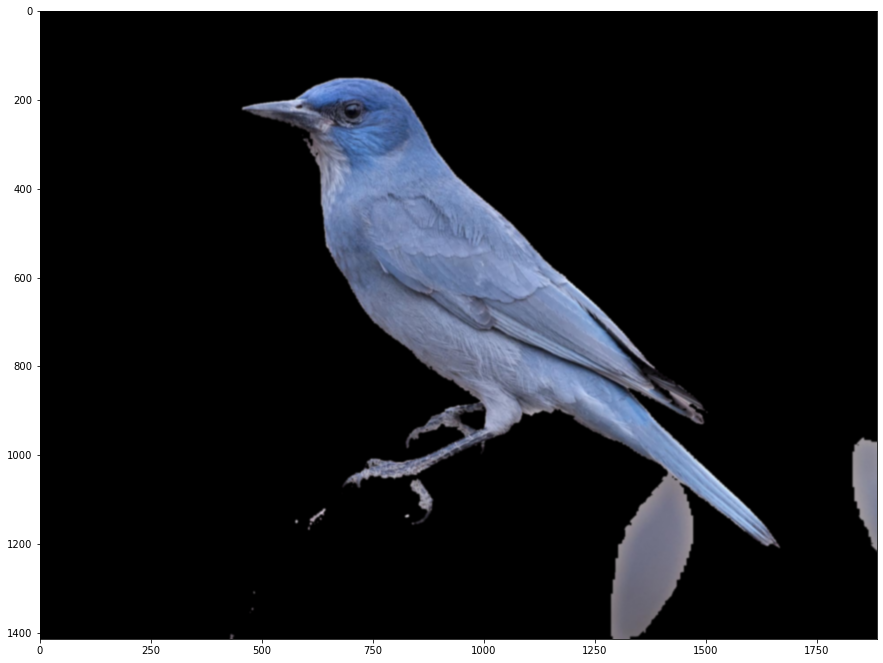

In [ ]:
# Blurring to smoothen dark dots in the middle of Nemo
blur_bird = cv2.GaussianBlur(result_blue, (9, 9), 0)

fig = plt.figure()
fig.set_size_inches(15, 15)
plt.imshow(blur_bird)
plt.show()

Si bien todo lo que se buscaba retener del pájaro se logró, tambien quedaron incluidas algunas zonas con tonalidades grises del fondo de la imagen. Se buscará eliminarlas.

In [ ]:
light_blue = (75, 0, 95)
dark_blue = (175, 50, 165)

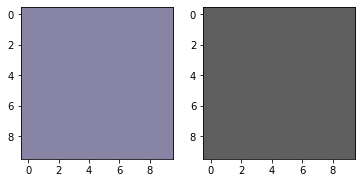

In [ ]:
lb_square = np.full((10, 10, 3), light_blue, dtype=np.uint8) / 255.0
db_square = np.full((10, 10, 3), dark_blue, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(db_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lb_square))
plt.show()

Se crea para este rango una máscara inversa que borre estas zonas de gris, y se sustrae a los resultados obtenidos anteriormente

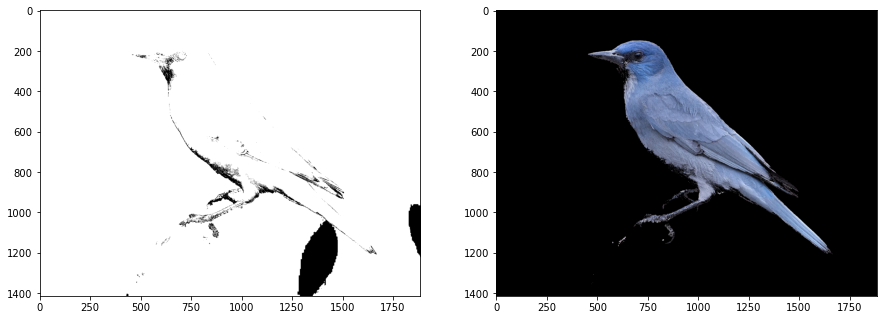

In [ ]:
mask_blue = (255 - cv2.inRange(hsv_bird, light_blue, dark_blue))
result_blue = cv2.bitwise_and(result_blue, result_blue, mask=mask_blue)

fig = plt.figure()
fig.set_size_inches(15, 15)
plt.subplot(1, 2, 1)
plt.imshow(mask_blue, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_blue)
plt.show()

El resultado final es el ave correctamente segmentada, y con muy buen lujo de detalle.

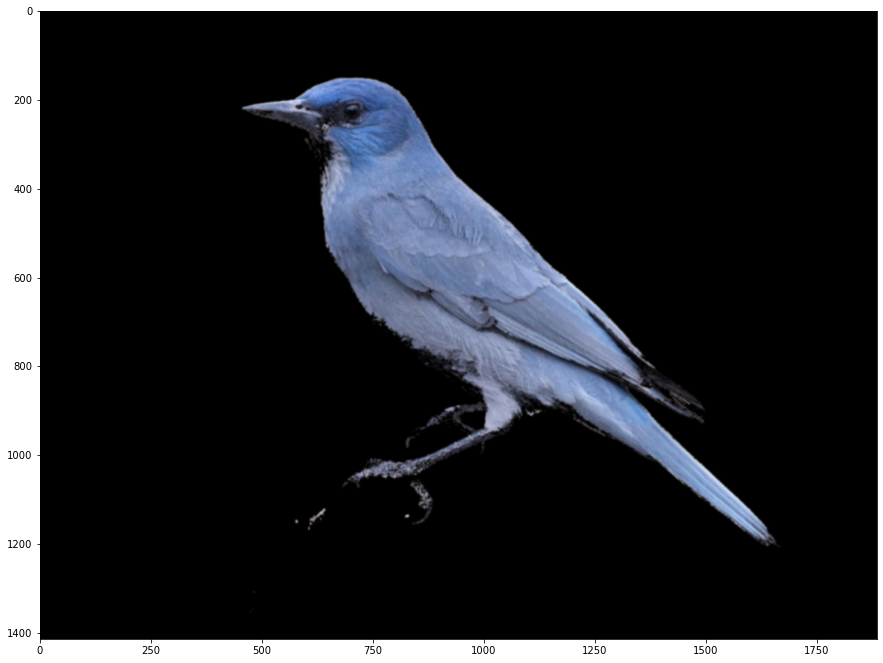

In [ ]:
# Blurring to smoothen dark dots in the middle of Nemo
blur_bird = cv2.GaussianBlur(result_blue, (9, 9), 0)

fig = plt.figure()
fig.set_size_inches(15, 15)
plt.imshow(blur_bird)
plt.show()